<a href="https://colab.research.google.com/github/manishmawatwal/DataScience/blob/main/FinancePortfolioOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Description: This program attempts to optimize a users portfolio using Efficient Frontier

In [3]:
#import python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#get stock symbol/tickers in the portfolio
#FAANG
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [5]:
#Assign weights to the stocks
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [6]:
#get the stock/portfolio starting date
stockStartDate = '2013-01-01'

In [7]:
#get the ending date
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-05-09'

In [8]:
#create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

In [9]:
#store the adjusted close price of the stock into the df
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start=stockStartDate, end=today)['Adj Close']

In [ ]:
#show the df
df

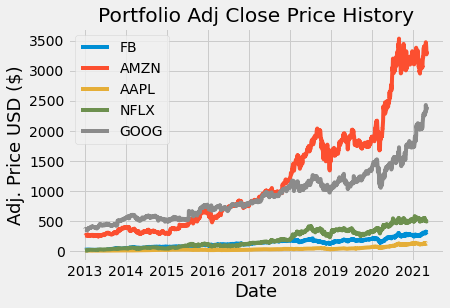

In [11]:
#visually show the stock/portfolio
title = 'Portfolio Adj Close Price History'

#get the stocks
my_stocks = df

#create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [ ]:
#show the daily simple return
returns = df.pct_change()
returns

In [13]:
#create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.118200,0.055077,0.045418,0.057034,0.050766
AMZN,0.055077,0.092854,0.040361,0.063633,0.047601
AAPL,0.045418,0.040361,0.082191,0.036095,0.038826
NFLX,0.057034,0.063633,0.036095,0.209936,0.049399
GOOG,0.050766,0.047601,0.038826,0.049399,0.066768


In [14]:
#Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.061534695622110246

In [15]:
#calulate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.24806187861521617

In [16]:
#calculate annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.3575158992582472

In [18]:
#show the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: ' + percent_ret)
print('Annual volatility/risks:' + percent_vols)
print('Annual variance' + percent_var)

Expected annual return: 36.0%
Annual volatility/risks:25.0%
Annual variance6.0%


In [ ]:
pip install PyPortfolioOpt

In [21]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [22]:
#Porfolio Optimization
#Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)

#optimize for max sharpe ratio
ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.13664), ('AMZN', 0.30128), ('AAPL', 0.24292), ('NFLX', 0.31915), ('GOOG', 0.0)])
Expected annual return: 39.6%
Annual volatility: 27.0%
Sharpe Ratio: 1.39


(0.39629732108100074, 0.27043634274713796, 1.391445089289809)

In [27]:
#get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'FB': 7, 'AMZN': 1, 'AAPL': 28, 'NFLX': 10}
Funds remaining: $790.55
